In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#from sklearn.model_selection import train_test_split

from xgboost import XGBRFRegressor, XGBRFClassifier
import xgboost as xgb

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
color_pal = sns.color_palette()

## Explore Data

In [98]:
data = pd.read_csv('PJME_hourly.csv')
data.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145366 entries, 0 to 145365
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  145366 non-null  object 
 1   PJME_MW   145366 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.2+ MB


In [100]:
data = data.set_index('Datetime')

In [101]:
data.index = pd.to_datetime(data.index)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145366 entries, 2002-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   PJME_MW  145366 non-null  float64
dtypes: float64(1)
memory usage: 2.2 MB


<Axes: title={'center': 'Energy using mgw'}, xlabel='Datetime'>

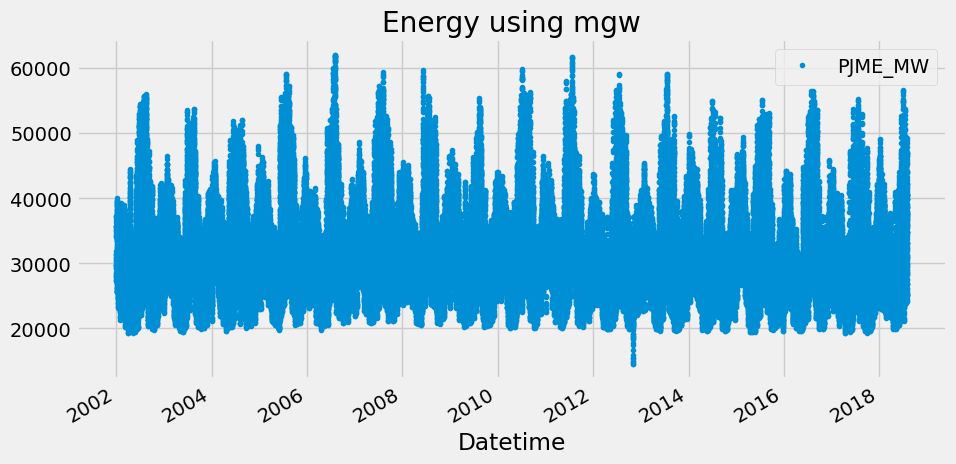

In [102]:

data.plot(figsize=(10,5), style='.', color = color_pal[0], title='Energy using mgw')


## Feature Creating

In [103]:
# hour - dayofweek - month - quarter - year - dayofyear

In [104]:
data['hour'] = data.index.hour
data['dayofweek'] = data.index.dayofweek
data['month'] = data.index.month
data['quarter'] = data.index.quarter
data['year'] = data.index.year
data['dayofyear'] = data.index.dayofyear


data

,PJME_MW,hour,dayofweek,month,quarter,year,dayofyear
Datetime,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,12,4,2002,365
2002-12-31 02:00:00,25147.0,2,1,12,4,2002,365
2002-12-31 03:00:00,24574.0,3,1,12,4,2002,365
2002-12-31 04:00:00,24393.0,4,1,12,4,2002,365
2002-12-31 05:00:00,24860.0,5,1,12,4,2002,365
...,...,...,...,...,...,...,...
2018-01-01 20:00:00,44284.0,20,0,1,1,2018,1
2018-01-01 21:00:00,43751.0,21,0,1,1,2018,1
2018-01-01 22:00:00,42402.0,22,0,1,1,2018,1


Text(0.5, 1.0, 'Energy Usage By Hour')

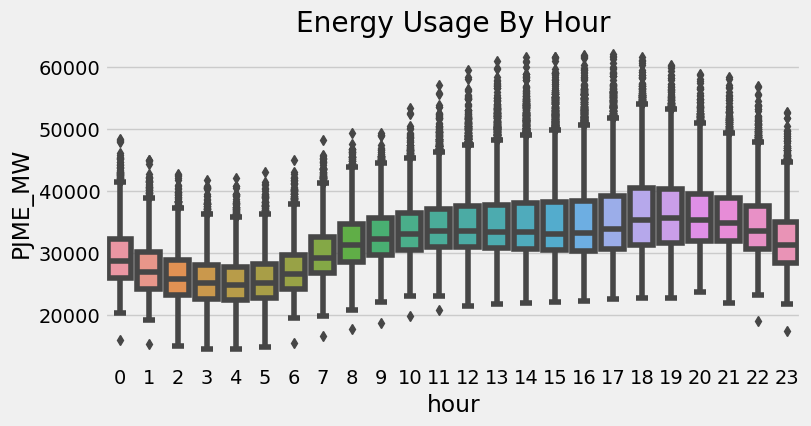

In [105]:
plt.subplots(figsize=(8,4))
sns.boxplot(data=data, x='hour' ,y='PJME_MW',)
plt.title('Energy Usage By Hour')

Text(0.5, 1.0, 'Energy Usage By Month')

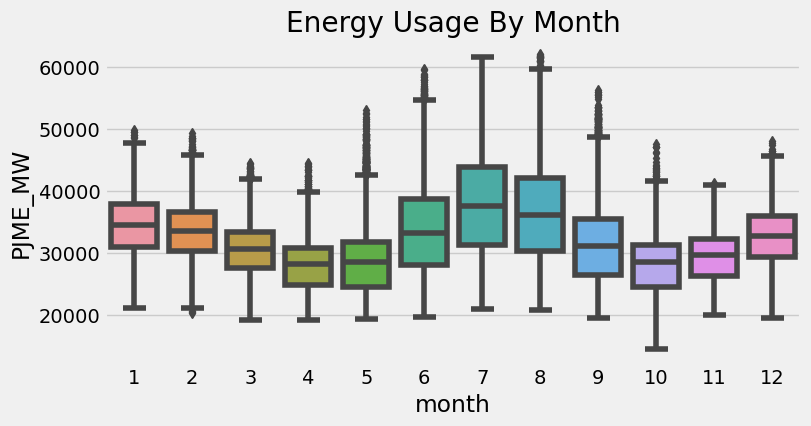

In [106]:
plt.subplots(figsize=(8,4))
sns.boxplot(data=data, x='month' ,y='PJME_MW',)
plt.title('Energy Usage By Month')

Text(0.5, 1.0, 'Energy Usage By Quarter')

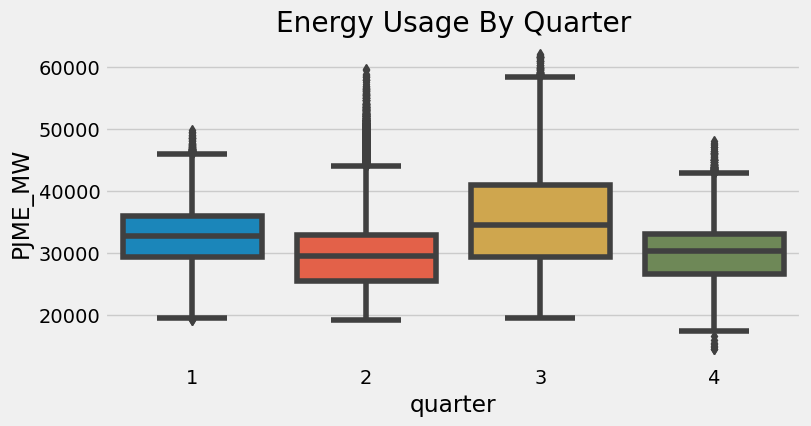

In [107]:
plt.subplots(figsize=(8,4))
sns.boxplot(data=data, x='quarter' ,y='PJME_MW',)
plt.title('Energy Usage By Quarter')

## Modeling

In [108]:
train_set = data.loc[data.index<'01-01-2015']
test_set = data.loc[data.index >= '01-01-2015']

Text(0.5, 1.0, 'Train Test Split')

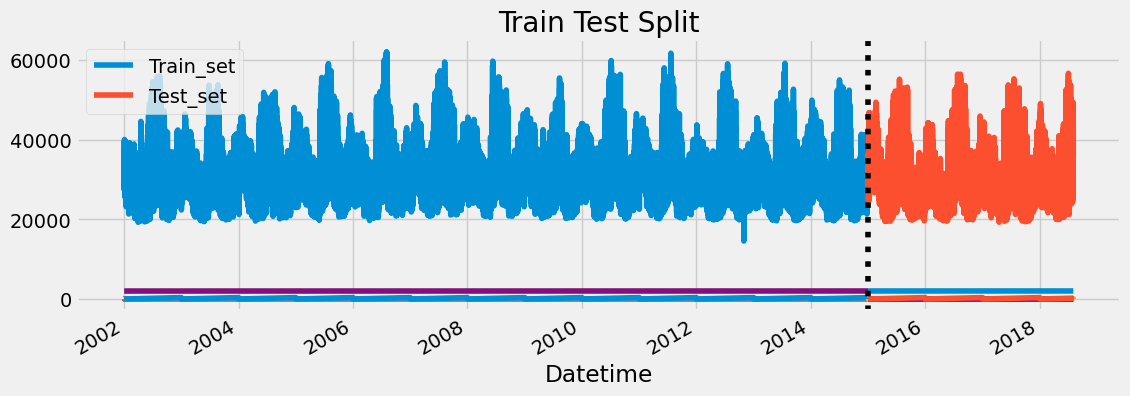

In [109]:
fig, ax=plt.subplots(figsize=(12,4))
train_set.plot(ax=ax)
test_set.plot(ax=ax)
ax.axvline('01-01-2015', color = 'Black', ls=':')
plt.legend(['Train_set', 'Test_set'])
plt.title('Train Test Split')

In [110]:
x_train =  train_set.drop('PJME_MW', axis=1)
y_train = train_set['PJME_MW']

x_test = test_set.drop('PJME_MW', axis=1)
y_test = test_set['PJME_MW']

In [111]:
model = XGBRFRegressor(n_estimator=1000, early_stopping_round = 50)


In [112]:
model.fit(x_train, y_train)


XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_round=50, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimator=1000, n_estimators=None,
               n_jobs=None, num_parallel_tree=None,
               objective='reg:squarederror', ...)

In [113]:
model.score(x_train, y_train)

0.7196246628654539

In [114]:
pred = model.predict(x_test)
mean_sq_error = mean_squared_error(pred, y_test)
mean_sq_error

15921476.94581398

In [115]:
np.sqrt(mean_squared_error(pred, y_test))

3990.1725458699125